In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
from scipy import sparse

## Kinker et al

In [14]:
dict_cellline_to_msi = {
    # Colon/Colorectal cancer
 'CCK81_LARGE_INTESTINE': 'MSI',
 'HCC56_LARGE_INTESTINE': 'MSS',
 'HT55_LARGE_INTESTINE': 'MSS',
 'LS180_LARGE_INTESTINE': 'MSI',
 'LS1034_LARGE_INTESTINE': 'MSS',
 'NCIH747_LARGE_INTESTINE': 'MSS', # MSI-L
 'OUMS23_LARGE_INTESTINE': 'MSS',
 'RCM1_LARGE_INTESTINE': 'MSS',

    # Endometrial cancer
 'EFE184_ENDOMETRIUM' : 'N/A',
 'HEC108_ENDOMETRIUM' : 'MSI',
 'HEC151_ENDOMETRIUM' : 'MSI',
 'HEC251_ENDOMETRIUM' : 'N/A',
 'HEC59_ENDOMETRIUM' : 'MSI',
 'HEC6_ENDOMETRIUM' : 'MSI',
 'MFE280_ENDOMETRIUM' : 'MSS',
 'MFE319_ENDOMETRIUM' : 'MSI',
 'SNU1077_ENDOMETRIUM' : 'N/A',
 'TEN_ENDOMETRIUM' : 'N/A',

   # Gastric cancer
 '2313287_STOMACH' : 'MSI',
 'IM95_STOMACH' : 'MSI-L',
 'LMSU_STOMACH': 'N/A',
 'MKN45_STOMACH' : 'MSS',
 'MKN7_STOMACH': 'MSI-L',
 'SH10TC_STOMACH' : 'N/A',
 
   # Pancreatic cancer
 'ASPC1_PANCREAS' : 'MSS',
 'HUPT3_PANCREAS' : 'MSS',
 'HUPT4_PANCREAS' : 'MSS',
 'PANC1_PANCREAS' : 'N/A',
 'SW1990_PANCREAS': 'MSS',
 'DANG_PANCREAS': 'MSS',
 'PK59_PANCREAS': 'N/A',
 'PANC0203_PANCREAS': 'MSS',
 'PATU8988S_PANCREAS': 'N/A',
 'PK45H_PANCREAS': 'N/A',
 'SU8686_PANCREAS' : 'MSS',
 
  # Lung cancer
 'NCIH727_LUNG': 'MSS',
 'NCIH2077_LUNG': 'N/A',
 'NCIH2087_LUNG': 'MSS',
 'NCIH1568_LUNG': 'MSS',
 'NCIH1048_LUNG': 'MSI', # MSI-H
 'NCIH1944_LUNG': 'MSS',
 'NCIH358_LUNG': 'MSS',
 'NCIH522_LUNG': 'MSS',
 'NCIH1792_LUNG': 'MSS',
 'CALU6_LUNG': 'MSS',

 'KPL1_BREAST': 'MSS',
 'MSTO211H_PLEURA': 'MSS',

 'SKMEL30_SKIN': 'MSS',
 'HS939T_SKIN': 'MSS',
 'HUH6_LIVER': 'N/A',
 'GOS3_CENTRAL_NERVOUS_SYSTEM': 'N/A',
 'KYSE520_OESOPHAGUS': 'MSS',
 'ZR751_BREAST': 'N/A',
 'VMRCRCZ_KIDNEY': 'MSS',
 'HS852T_SKIN': 'N/A',
 'T47D_BREAST': 'MSS',
 'COLO792_SKIN': 'MSS',
 'HCC1419_BREAST': 'MSS',
 'TOV21G_OVARY': 'MSI', # MSI-H
 'HS729_SOFT_TISSUE': 'N/A',
 'TE6_OESOPHAGUS': 'MSS',
 'SNU738_CENTRAL_NERVOUS_SYSTEM': 'N/A',
 'OVTOKO_OVARY': 'MSS',
 'RD_SOFT_TISSUE': 'MSS',
 'PC3_PROSTATE': 'MSS',
 'TCCSUP_URINARY_TRACT': 'MSS',
 'OVSAHO_OVARY': 'N/A',
 'SNU423_LIVER': 'MSS',
 'JHOS2_OVARY': 'MSS',
 'EFM192A_BREAST': 'MSS',
 'RVH421_SKIN': 'MSS',
 'KMRC3_KIDNEY': 'N/A',
 'TE1_OESOPHAGUS': 'MSS',
 }

In [3]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Kinker_et_al/CPM_data.metalabeled.h5ad')

In [4]:
orig_cellcount = len(adata)
orig_cellcount

53513

In [6]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=10)

In [11]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata.copy()

In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="PoolID")
adata = adata[:, adata.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


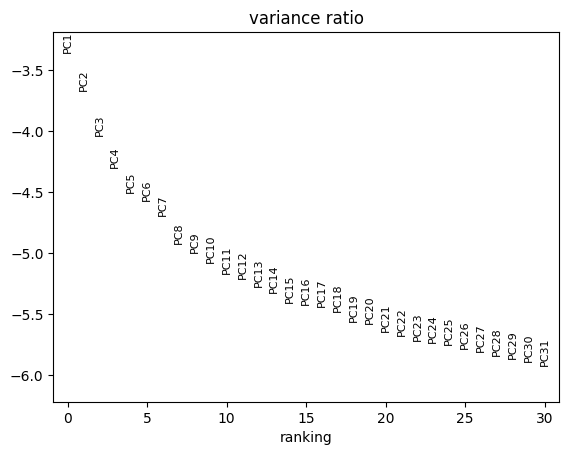

In [13]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

In [16]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

2024-12-24 00:47:02.436868: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-24 00:47:02.438105: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-24 00:47:02.442523: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-24 00:47:02.458807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-24 00:47:02.483538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [17]:
sc.tl.umap(adata, random_state=42)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [20]:
adata.write('/node200data/18parkky/datasets/data/public/processed_data/Kinker_et_al/CPM_data.scanpy_preprocessed.h5ad')

In [21]:
set(adata.obs['CancerType'])

{'Bile Duct Cancer',
 'Bladder Cancer',
 'Bone Cancer',
 'Brain Cancer',
 'Breast Cancer',
 'Colon/Colorectal Cancer',
 'Endometrial/Uterine Cancer',
 'Esophageal Cancer',
 'Fibroblast',
 'Gallbladder Cancer',
 'Gastric Cancer',
 'Head and Neck Cancer',
 'Kidney Cancer',
 'Liver Cancer',
 'Lung Cancer',
 'Neuroblastoma',
 'Ovarian Cancer',
 'Pancreatic Cancer',
 'Prostate Cancer',
 'Sarcoma',
 'Skin Cancer',
 'Thyroid Cancer'}

In [24]:
adata[adata.obs['CancerType'].isin(['Colon/Colorectal Cancer', 'Gastric Cancer', 'Endometrial/Uterine Cancer'])].write('/node200data/18parkky/datasets/data/public/processed_data/Kinker_et_al/CPM_data.scanpy_preprocessed.CRC-GC-EC.h5ad')

## Chen et al

In [2]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/1_raw_h5ad/Chen.MSI.raw.h5ad')

In [3]:
orig_cellcount = len(adata)
orig_cellcount

228943

### (1) Doublet detection (Scrublet)

In [4]:
np.mean( adata.obs['doublet_score'] ) + 1*np.std( adata.obs['doublet_score'] )

0.10152910752912192

In [5]:
adata = adata[adata.obs['doublet_score']<=np.mean( adata.obs['doublet_score'] ) + 1*np.std( adata.obs['doublet_score'] ), ].copy()

### (2) Cell type labeling using author annotations

In [6]:
chen_cell_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/AuthorProcessedData/GSE236581_CRC-ICB_metadata.txt.gz', sep=' ')
chen_cell_metadata['CB'] = [ idx.split("_")[-1] for idx in chen_cell_metadata.index ]
chen_cell_metadata['SampleID'] = [ tup.Ident.replace('CRC', 'P') for tup in chen_cell_metadata.itertuples() ]
chen_cell_metadata['Identifier'] = [ f'{tup.SampleID}-{tup.CB}' for tup in chen_cell_metadata.itertuples() ]
len(chen_cell_metadata)==len(set(chen_cell_metadata['Identifier']))

True

In [7]:
adata.obs['Identifier'] = [ f'{tup.SampleID}-{tup.Index.split("-")[0]}' for tup in adata.obs.itertuples() ]
adata.obs.shape[0] == len(set(adata.obs['Identifier']))

True

In [8]:
dict_Identifier_to_Celltypes = { tup.Identifier : [tup.MajorCellType, tup.SubCellType] for tup in chen_cell_metadata.itertuples() }

col_MajorCellType, col_SubCellType = list(), list()
for tup in adata.obs.itertuples():
    try:
        CellTypes = dict_Identifier_to_Celltypes[tup.Identifier]
        col_MajorCellType.append( CellTypes[0] )
        col_SubCellType.append( CellTypes[1] )
    except KeyError:
        col_MajorCellType.append( 'N/A' )
        col_SubCellType.append( 'N/A' )
        
adata.obs['Author_CellType_lvl_1'] = col_MajorCellType
adata.obs['Author_CellType_lvl_2'] = col_SubCellType

adata.obs[(adata.obs['Author_CellType_lvl_1']!='N/A')].shape[0]/adata.obs.shape[0] 

0.554233572089944

In [9]:
adata = adata[adata.obs['Author_CellType_lvl_1']!='N/A'].copy()
adata.shape

(115525, 36601)

### (3) Scanpy pipeline

In [10]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=10)

<Axes: xlabel='total_counts', ylabel='Count'>

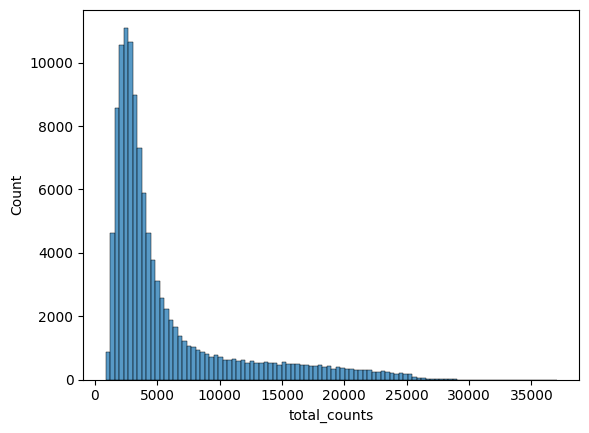

In [11]:
sns.histplot(adata.obs[(adata.obs['total_counts']<=50000)]["total_counts"], bins=100, kde=False)

In [12]:
adata.raw = adata.copy()

In [13]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [14]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="SampleID")

In [15]:
adata = adata[:, adata.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


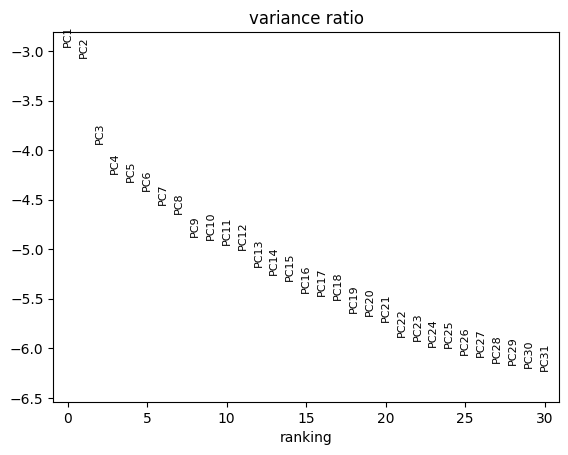

In [16]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

In [17]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

2024-12-20 14:47:38.299555: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 14:47:38.301483: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 14:47:38.306016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 14:47:38.321374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-20 14:47:38.346864: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [23]:
sc.tl.umap(adata, random_state=42)

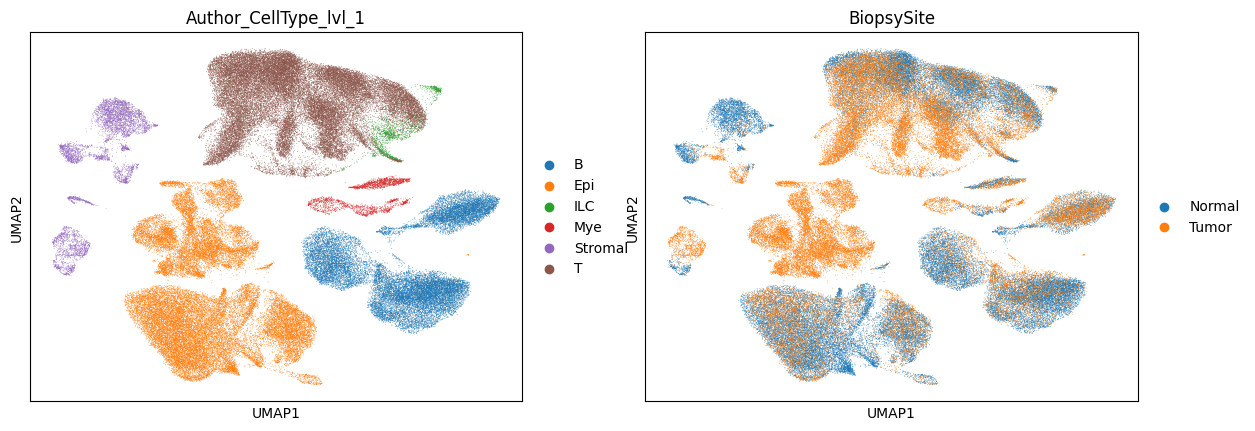

In [30]:
sc.pl.umap(adata, 
           color=['Author_CellType_lvl_1', 'BiopsySite'],
           )

In [31]:
adata.write('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.h5ad')

## Joanito et al (MSI+MSS)

In [2]:
adata_KUL_MSI = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/1_raw_h5ad/Joanito.CRC-SG1.MSI.raw.h5ad')
adata_SG1_MSI = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/1_raw_h5ad/Joanito.KUL.MSI.raw.h5ad')

adata_SG1_MSS = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/1_raw_h5ad/Joanito.CRC-SG1.MSS.raw.h5ad')
adata_KUL_MSS = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/1_raw_h5ad/Joanito.KUL.MSS.raw.h5ad')

In [13]:
adata = sc.concat([adata_KUL_MSI, adata_SG1_MSI, adata_SG1_MSS, adata_KUL_MSS])
adata.write('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/1_raw_h5ad/Joanito.raw.h5ad')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [361]:
orig_cellcount = len(adata)
orig_cellcount

246578

### (1) Doublet detection (Scrublet)

In [48]:
np.mean( adata.obs['doublet_score'] ) + 1*np.std( adata.obs['doublet_score'] )

0.09194701440204112

In [49]:
adata = adata[adata.obs['doublet_score']<=np.mean( adata.obs['doublet_score'] ) + 1*np.std( adata.obs['doublet_score'] ), ].copy()

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [364]:
set(adata.obs['PatientID'])

{'CRC2783',
 'CRC2786',
 'CRC2787',
 'CRC2801',
 'CRC2817',
 'CRC2821',
 'SC035',
 'SC040',
 'SC041',
 'SC044'}

### (2) Cell type labeling using author annotations

In [50]:
joanito_metadata_epi    = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/CRC-SG1/synapse-metadata/Epithelial_metadata.csv')
joanito_metadata_nonepi = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/CRC-SG1/synapse-metadata/NonEpithelial_metadata.csv')
joanito_metadata = pd.concat([ joanito_metadata_epi, joanito_metadata_nonepi ])

joanito_metadata = joanito_metadata[(joanito_metadata['patient.ID'].isin( set(adata.obs['PatientID']) ))].copy()
joanito_metadata.rename({'sample.origin' : 'BiopsySite'}, axis=1, inplace=True)
joanito_metadata['CB'] = [ cellID.split("_")[-1].split("-")[0] for cellID in joanito_metadata['cell.ID'] ]

In [51]:
joanito_metadata_download = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/CRC-SG1/EGAF_records.formated.tsv',sep='\t')
joanito_metadata_download[joanito_metadata_download['EGAF'].isin(['EGAF00005798482', 'EGAF00005798483'])]

,EGAF,file_size,check_sum,file_name
57,EGAF00005798482,7188225266,84c2c59d4ab849eb27084353feeec56d,XHC169-SI-GA-B11_S1_L003_R1_001.fastq.gz
58,EGAF00005798483,24860722323,9891ed4f6102fe4d039b05bbd893c34e,XHC169-SI-GA-B11_S1_L003_R2_001.fastq.gz


In [ ]:
# Strangely, Joanito metadata provides a weird set of Sample ID.. So we have to manually find out which sample match to which sample

In [52]:
joanito_metadata['hasMUX'] = [ bool('MUX' in sampleID) for sampleID in joanito_metadata['sample.ID'] ]
set(joanito_metadata[joanito_metadata['hasMUX']==True]['patient.ID'])

{'CRC2801', 'CRC2817', 'CRC2821'}

In [223]:
PatientOfInterest = 'CRC2817'

dict_SampleID_to_setCB = dict()
dict_MUXID_to_SampleID = dict()

adata.obs['CB'] = [ tup.Index.split('-')[0] for tup in adata.obs.itertuples() ]

for SampleID, edf in adata.obs[adata.obs['PatientID']==PatientOfInterest].groupby("SampleID"):
    if len(edf)==0: continue 
    dict_SampleID_to_setCB[SampleID] = set(edf['CB'])

for SampleID, edf in joanito_metadata[(joanito_metadata['hasMUX']==True) & 
                                      (joanito_metadata['patient.ID']==PatientOfInterest)].groupby("sample.ID"):
    setCB = set(edf['CB'])
    dict_SampleID_to_intersection_rate = dict()
    for SampleID2, setCB2 in dict_SampleID_to_setCB.items():
        dict_SampleID_to_intersection_rate[SampleID2] = len( setCB.intersection(setCB2) ) / len(setCB)
    dict_SampleID_to_intersection_rate = dict(sorted(dict_SampleID_to_intersection_rate.items(), key=lambda x:x[1], reverse=True))
    for k, v in dict_SampleID_to_intersection_rate.items():
        print(SampleID, k, v)
        dict_MUXID_to_SampleID[SampleID] = k
        break

adata.obs.drop('CB', axis=1, inplace=True)
dict_MUXID_to_SampleID

MUX8815 XHC129 0.9485280151946819
MUX8816 XHC130 0.9579233828762822
MUX8817 XHC131 0.9830035514967022
MUX9005 XHC134 0.958997722095672
MUX9006 XHC135 0.9685145317545748
MUX9007 XHC136 0.9744463373083475
MUX9008 XHC137 0.9479495268138801
MUX9009 XHC138 0.9539951573849879
MUX9010 XHC139 0.9697885196374623
MUX9322 XHC154 0.9473684210526315
MUX9380 XHC166 0.9722222222222222


/tmp/ipykernel_68844/3875998085.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata.obs[adata.obs['PatientID']==PatientOfInterest].groupby("SampleID"):


{'MUX8815': 'XHC129',
 'MUX8816': 'XHC130',
 'MUX8817': 'XHC131',
 'MUX9005': 'XHC134',
 'MUX9006': 'XHC135',
 'MUX9007': 'XHC136',
 'MUX9008': 'XHC137',
 'MUX9009': 'XHC138',
 'MUX9010': 'XHC139',
 'MUX9322': 'XHC154',
 'MUX9380': 'XHC166'}

In [53]:
dict_MUXID_to_SampleID = {  'MUX8579': 'XHC102',
                            'MUX8580': 'XHC103',
                            'MUX8581': 'XHC104',
                            'MUX8582': 'XHC105',
                            'MUX8583': 'XHC106',
                            'MUX8584': 'XHC107',
                            
                            'MUX8815': 'XHC129',
                            'MUX8816': 'XHC130',
                            'MUX8817': 'XHC131',
                            'MUX9005': 'XHC134',
                            'MUX9006': 'XHC135',
                            'MUX9007': 'XHC136',
                            'MUX9008': 'XHC137',
                            'MUX9009': 'XHC138',
                            'MUX9010': 'XHC139',
                            'MUX9322': 'XHC154',
                            'MUX9380': 'XHC166',
                             
                            'MUX9011': 'XHC140',
                            }

In [54]:
col_SampleID = list()
for tup in joanito_metadata.itertuples():
    try:
        col_SampleID.append(dict_MUXID_to_SampleID[list(tup)[5]])
    except KeyError:
        col_SampleID.append( list(tup)[5] )
        
joanito_metadata['SampleID'] = col_SampleID
joanito_metadata['Identifier'] = [ f'{tup.SampleID}-{tup.CB}' for tup in joanito_metadata.itertuples() ]
joanito_metadata.head(2)

,cell.ID,nCount_RNA,nFeature_RNA,percent.mt,sample.ID,patient.ID,BiopsySite,dataset,cell.type,iCMS,msi,CB,hasMUX,SampleID,Identifier
1323,CRC16_MUX8579_AAATGCCGTTGGAGGT-1,16813,5244,18.613460,MUX8579,CRC2801,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,AAATGCCGTTGGAGGT,True,XHC102,XHC102-AAATGCCGTTGGAGGT
1324,CRC16_MUX8579_AACCATGCACCTATCC-1,33955,6132,4.467956,MUX8579,CRC2801,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,AACCATGCACCTATCC,True,XHC102,XHC102-AACCATGCACCTATCC


In [55]:
adata.obs['Identifier'] = [ f'{tup.SampleID}-{tup.Index.split("-")[0]}' for tup in adata.obs.itertuples() ]
adata.obs.shape[0] == len(set(adata.obs['Identifier']))

True

In [56]:
dict_Identifier_to_Celltypes = { tup.Identifier : list(tup)[-7] for tup in joanito_metadata.itertuples() }

col_MajorCellType = list()
for tup in adata.obs.itertuples():
    try:
        CellTypes = dict_Identifier_to_Celltypes[tup.Identifier]
        col_MajorCellType.append( CellTypes )
    except KeyError:
        col_MajorCellType.append( 'N/A' )
        
adata.obs['Author_CellType_lvl_1'] = col_MajorCellType
adata.obs['Author_CellType_lvl_2'] = 'N/A'

adata.obs[(adata.obs['Author_CellType_lvl_1']!='N/A')].shape[0]/adata.obs.shape[0] 

0.48570459839454694

In [57]:
adata = adata[adata.obs['Author_CellType_lvl_1']!='N/A'].copy()
adata.shape

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(110304, 36601)

In [64]:
adata.obs_names_make_unique()

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CAACCAAAGAACAACT-1-1', 'CGTTAGACATTGGTAC-1-1', 'GTAGGCCGTCTAAACC-1-1', 'GTGCATACACTGCCAG-1-1', 'AAACCTGAGACAGGCT-1-1']
  warnings.warn(


### (3) Scanpy pipeline

In [65]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=10)

In [67]:
adata.raw = adata.copy()

In [68]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [69]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="SampleID")

In [70]:
adata = adata[:, adata.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


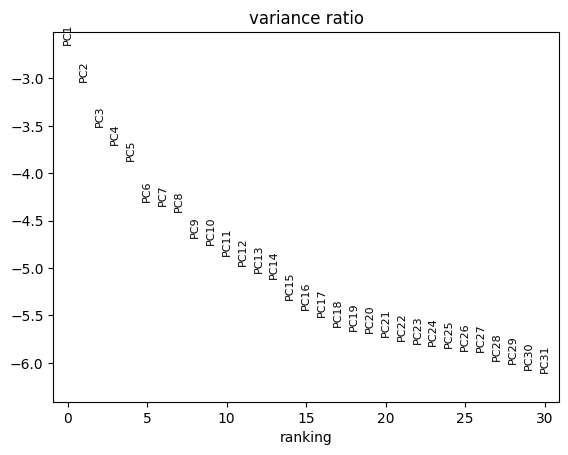

In [71]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

In [72]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [73]:
sc.tl.umap(adata,)

In [382]:
# adata.obs['BiopsySite'].replace( {
#     'Adjacent normal tissue' : 'Normal',
#     'Core' : 'Tumor',
#     'Invasive' : 'Tumor',
#     'LymphNode' : 'LymphNode',
#     'Normal' : 'Normal',
#     'Tumor' : 'Tumor'
# }, inplace=True )

/tmp/ipykernel_68844/1688383004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs['BiopsySite'].replace( {
/tmp/ipykernel_68844/1688383004.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['BiopsySite'].replace( {


In [74]:
sc.tl.leiden(adata, resolution=0.1,)

/tmp/ipykernel_79396/3625317837.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.1,)


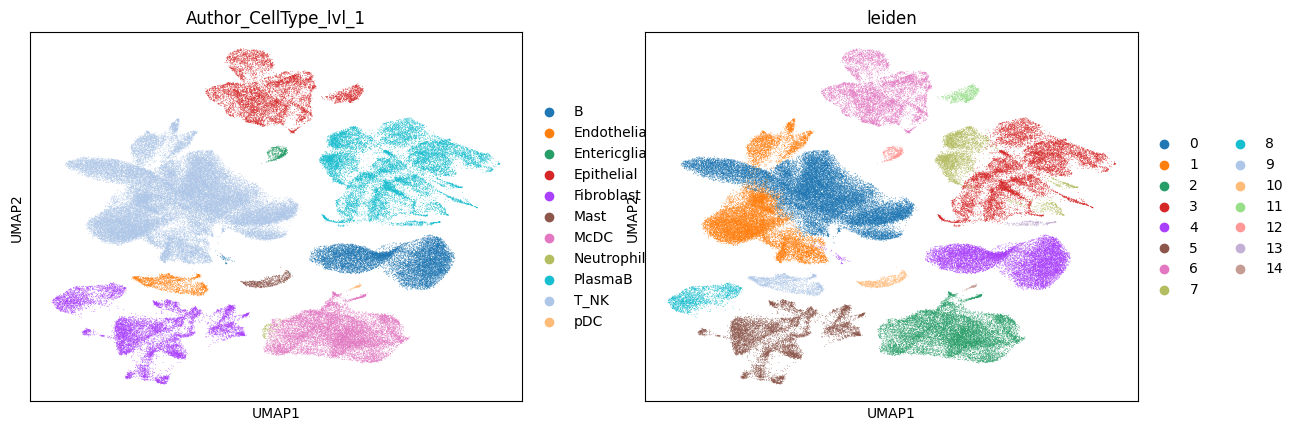

In [75]:
sc.pl.umap(adata, 
           color=['Author_CellType_lvl_1', 'leiden',],
           ncols=2
           )

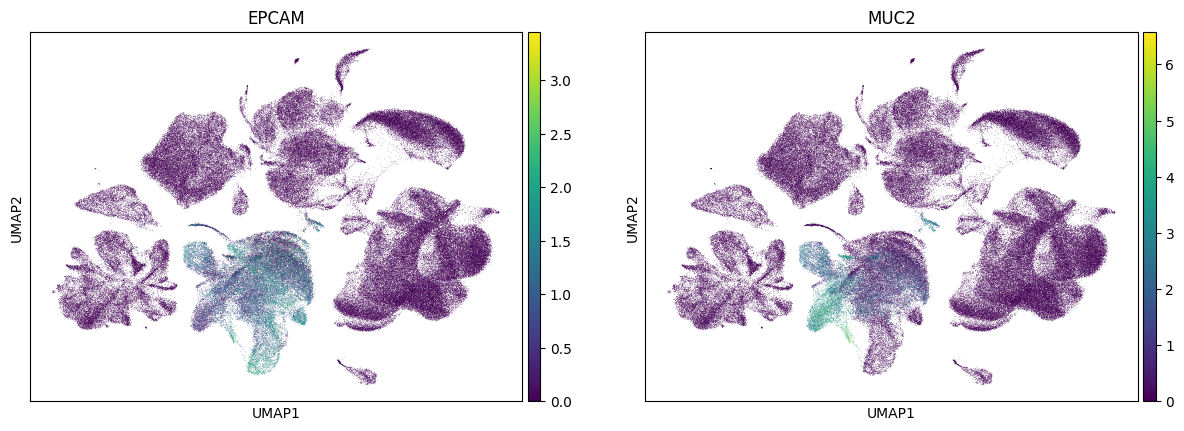

In [388]:
sc.pl.umap(adata[adata.obs['leiden'].isin([''])], 
           color=['EPCAM', 'MUC2'],
           ncols=2,
           )

In [76]:
adata.write('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.h5ad')